In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler as SSc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#set width of window to preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
data = pd.read_csv("Data-Prepped.csv",index_col=0)
data = data.astype(np.float32)
data.head()

,Bronze,Silver,Gold,Platinum,Diamond,Master,GrandMaster,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,10.0,3000.0,143.718002,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.667702,40.867298,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,23.0,10.0,5000.0,129.232193,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.919399,42.345402,4.8434,22.0,0.001194,5.0,0.0,0.000208
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,30.0,10.0,200.0,69.961197,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.647499,75.354797,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,19.0,20.0,400.0,107.601601,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.220301,53.735199,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,32.0,10.0,500.0,122.890800,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.688499,62.081299,9.3740,15.0,0.001174,4.0,0.0,0.000019


In [3]:
data.describe()

,Bronze,Silver,Gold,Platinum,Diamond,Master,GrandMaster,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,0.050030,0.103954,0.165668,0.242960,0.240863,0.186040,0.010485,4.120731,21.650389,15.909527,960.421814,114.575768,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713818,64.209587,5.266955,22.116837,0.001031,6.541042,0.000060,0.000142
std,0.218039,0.305247,0.371838,0.428935,0.427671,0.389197,0.101875,1.448170,4.206357,11.964495,17318.134766,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057190,19.037394,1.500605,7.440876,0.000520,1.859048,0.000112,0.000266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,3.000000,22.059601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632601,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,19.000000,8.000000,300.000000,79.231501,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326599,50.886426,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,21.000000,12.000000,500.000000,107.070297,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058901,61.296099,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,24.000000,20.000000,800.000000,140.156094,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510426,74.032524,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,44.000000,168.000000,1000000.000000,389.831390,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142899,176.372101,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


#### PCA without data standardization


PCA explained variance ratio: [9.9998921e-01 8.7728649e-06 8.1147618e-07 4.4801843e-07 3.5246873e-07
 1.4564591e-07 5.3040186e-08 1.5384209e-08 7.3575586e-09 4.9137507e-09
 1.2940993e-14 7.0367040e-16]

PCA singular values:          [1.0004127e+06 2.9631406e+03 9.0119635e+02 6.6962164e+02 5.9393896e+02
 3.8179538e+02 2.3040083e+02 1.2408496e+02 8.5812073e+01 7.0127457e+01
 1.1380605e-01 2.6537877e-02]


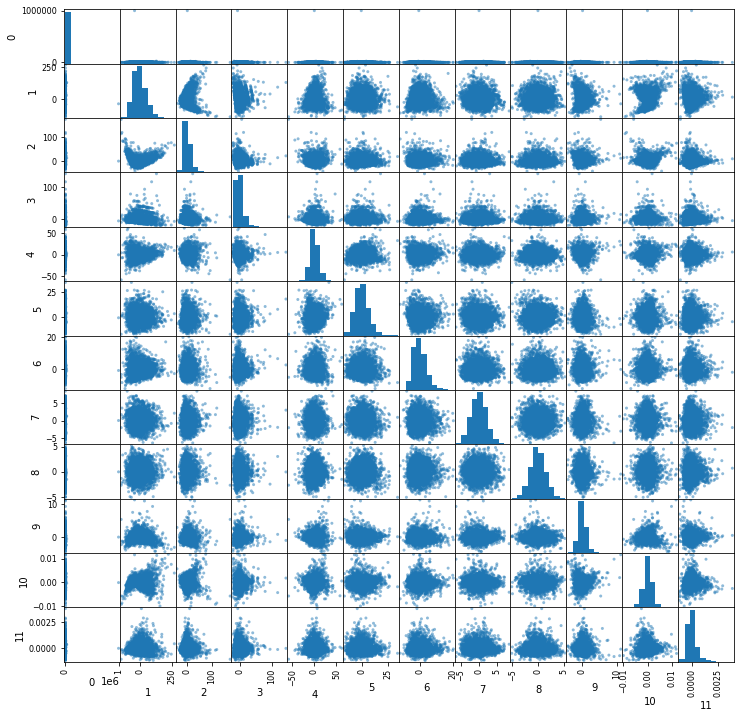

In [4]:
X = data.iloc[:,8:]
y = data.iloc[:,7]
pca = PCA(n_components=12)
pca.fit(X)
#print("PCA components:               "+str(pca.components_))
print("\nPCA explained variance ratio: "+str(pca.explained_variance_ratio_))
print("\nPCA singular values:          "+str(pca.singular_values_))

x = pd.DataFrame(pca.transform(X))
pd.plotting.scatter_matrix(x,figsize=(12,12));

#### PCA with data standardization


PCA explained variance ratio: [9.9998921e-01 8.7728895e-06 8.1147579e-07 4.4799535e-07 3.5246850e-07
 1.4564579e-07 5.3040122e-08 1.5384233e-08 7.3575546e-09 4.9137490e-09
 1.2940999e-14 7.0366955e-16]

PCA singular values:          [1.00041269e+06 2.96314453e+03 9.01196106e+02 6.69604370e+02
 5.93938782e+02 3.81795227e+02 2.30400696e+02 1.24085045e+02
 8.58120499e+01 7.01274490e+01 1.13806076e-01 2.65378617e-02]


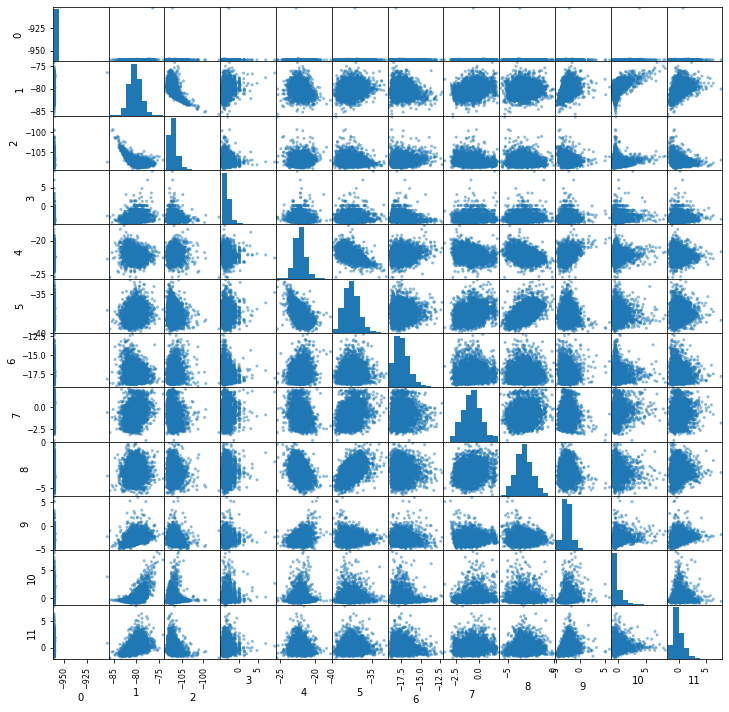

In [5]:
pca = PCA(n_components=12)
pca.fit(X)
#print("PCA components:               "+str(pca.components_))
print("\nPCA explained variance ratio: "+str(pca.explained_variance_ratio_))
print("\nPCA singular values:          "+str(pca.singular_values_))

ssc = SSc()
x = pd.DataFrame(ssc.fit_transform(X))

x = pd.DataFrame(pca.transform(x))
pd.plotting.scatter_matrix(x,figsize=(12,12));

#### PCA analysis of League Placement (2 components)

In [6]:
def pcaout(pca, n_ftrs, col_nms):   
    print("Principal components:")
    idx = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']
    return pd.DataFrame(pca.components_, columns=col_nms, index = idx[:n_ftrs])

PCA explained variance ratio:  [0.26761666 0.11463843]
Portion of variance explained: [0.7000997  0.29990032]


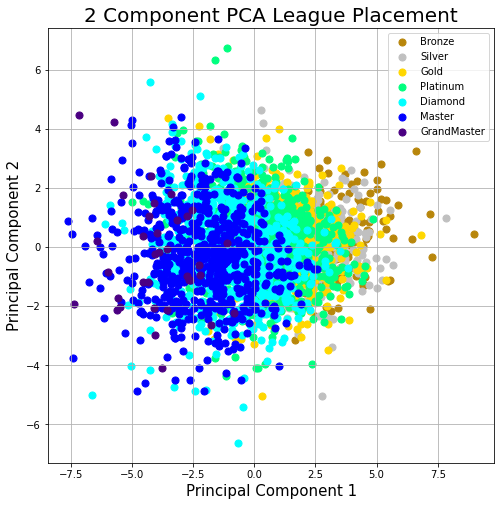

In [7]:
X = data.iloc[:,8:]
Xcol = X.columns
Y = data.iloc[:,7]
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
componentDf = pd.DataFrame(data=components, columns=['principal component 1', 'principal component 2'])

pltDF = pd.concat([componentDf, Y], axis = 1)
print("PCA explained variance ratio:  {}".format(pca.explained_variance_ratio_))
print("Portion of variance explained: {}".format(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)))


#plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA League Placement', fontsize = 20)


results = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
colors = ['darkgoldenrod','silver','gold','springgreen','aqua','blue','indigo']
for result, color in zip(results,colors):
    indicesToKeep = (pltDF['LeagueIndex'] == result)
    ax.scatter(pltDF.loc[indicesToKeep, 'principal component 1']
               , pltDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"])
ax.grid()

In [8]:
df = pcaout(pca, 2, Xcol)
df

Principal components:


,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
PC-1,0.108518,-0.130121,-0.029533,-0.396779,-0.276801,-0.299392,-0.222409,-0.142881,-0.169176,-0.359021,0.300263,0.383408,-0.098680,-0.220509,-0.199250,-0.176618,-0.170158,-0.154806
PC-2,0.085461,-0.092836,-0.044787,-0.243875,-0.240381,-0.063163,0.085265,-0.033908,-0.072313,0.112574,0.205613,0.048703,-0.364267,0.412581,-0.065115,0.462831,0.382835,0.349178


#### PCA analysis of League Placement (3 components)

PCA explained variance ratio:  [0.26761657 0.11463729 0.08399942]
Portion of variance explained: [0.5739725  0.24586913 0.18015835]


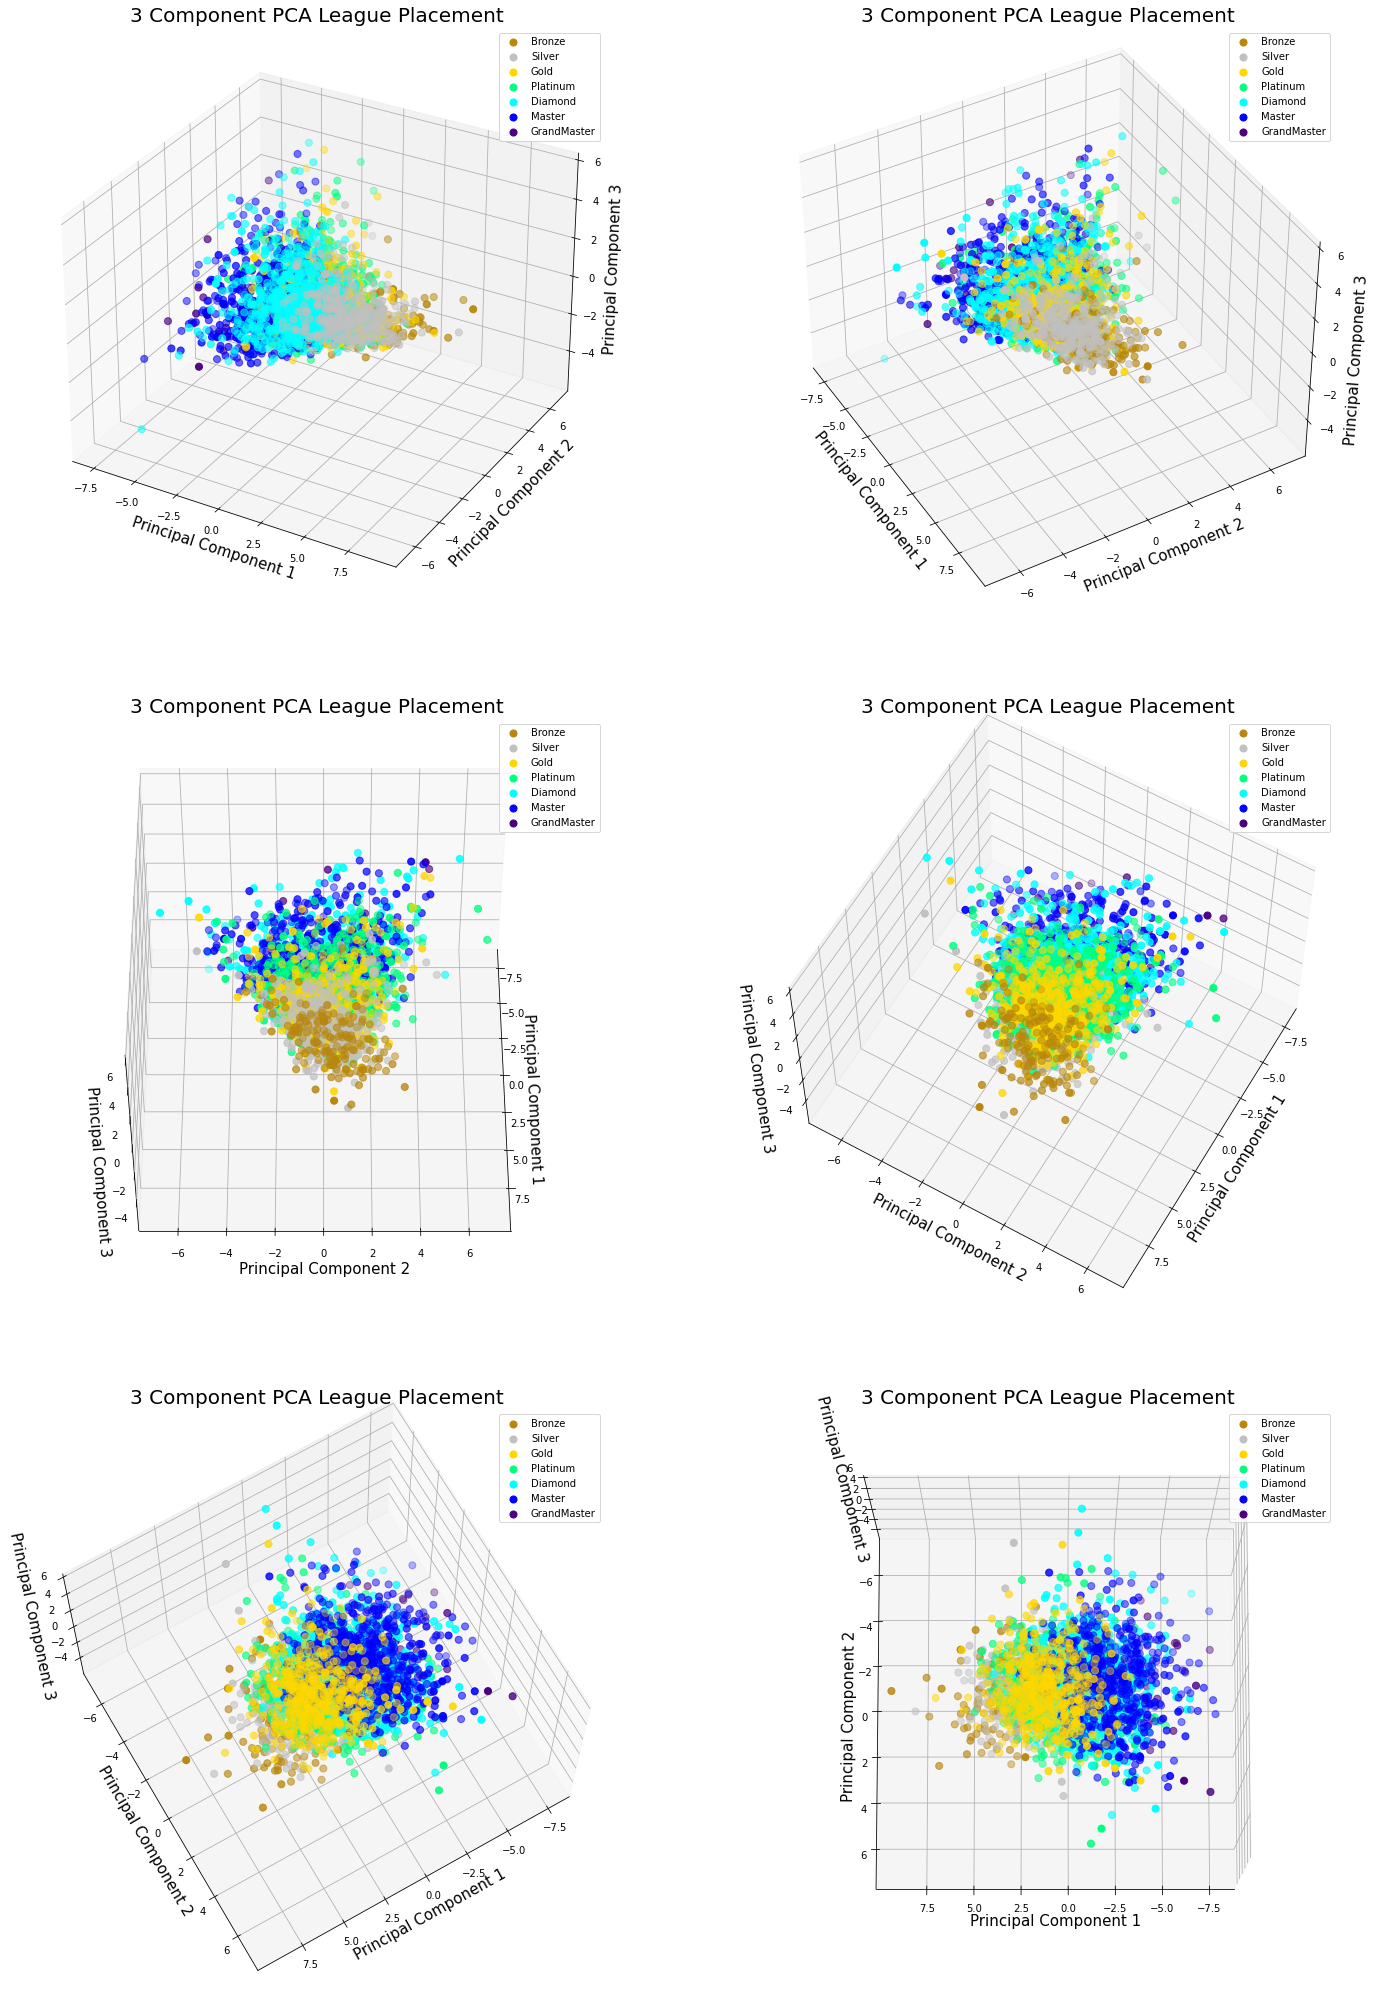

In [11]:
X = data.iloc[:,8:]
Y = data.iloc[:,7]
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)

pca = PCA(n_components=3)
components = pca.fit_transform(X)
componentDf = pd.DataFrame(data=components, columns=['principal component 1', 'principal component 2', 'principal component 3'])

pltDF = pd.concat([componentDf, Y], axis = 1)
print("PCA explained variance ratio:  {}".format(pca.explained_variance_ratio_))
print("Portion of variance explained: {}".format(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)))


#plot
fig = plt.figure(figsize = (24,36))


results = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
colors = ['darkgoldenrod','silver','gold','springgreen','aqua','blue','indigo']

for i in range(6):
    ax = fig.add_subplot(3,2,i+1,projection='3d') 
    ax.view_init(30+(10*i),300+(30*i))
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 Component PCA League Placement', fontsize = 20)

    for result, color in zip(results,colors):
        indicesToKeep = (pltDF['LeagueIndex'] == result)
        ax.scatter(pltDF.loc[indicesToKeep, 'principal component 1']
                   , pltDF.loc[indicesToKeep, 'principal component 2']
                   , pltDF.loc[indicesToKeep, 'principal component 3']
                   , c = color
                   , s = 50)
    ax.legend(["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"])
    ax.grid()


##### from this, it's pretty clear that the PCA variables (particularly component 1) differentiates the league of the player very well despite the player's league not being input.